# Importing Libraries

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Processed Test Data and Trained Models

In [2]:
rf = joblib.load(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\rf_model.pkl")
xgb = joblib.load(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\xgb_model.pkl")

data = pd.read_csv(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\data\processed\loan_data_processed.csv")

data = data.dropna()

x = data.drop(columns = ["loan_status"], axis = 1)
y = data["loan_status"]

# Split for evaluate

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [4]:
# Predict probabilities and classes
y_pred_rf = rf.predict(x_train)
y_proba_rf = rf.predict_proba(x_train)[:, 1]

y_pred_xgb = xgb.predict(x_train)
y_proba_xgb = xgb.predict_proba(x_train)[:, 1]

# Evaluate

In [5]:
print("Random Forest: \n", classification_report(y_train, y_pred_rf))
print("XGBoost: \n", classification_report(y_train, y_pred_xgb))

Random Forest: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      2120
           1       0.87      0.97      0.91      1295

    accuracy                           0.93      3415
   macro avg       0.92      0.94      0.93      3415
weighted avg       0.94      0.93      0.93      3415

XGBoost: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2120
           1       0.86      0.92      0.89      1295

    accuracy                           0.92      3415
   macro avg       0.91      0.92      0.91      3415
weighted avg       0.92      0.92      0.92      3415



# Key Performance Area

In [6]:
importances_rf = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
importances_xgb = pd.Series(xgb.feature_importances_, index=x.columns).sort_values(ascending=False)
print("\nTop KPAs (Random Forest):")
print(importances_rf.head())
print("\nTop KPAs (XGBoost):")
print(importances_xgb.head())


Top KPAs (Random Forest):
cibil_score             0.533498
debt_to_income_ratio    0.107282
loan_term_in_months     0.098791
Asset_Score_in_lakhs    0.075298
loan_amount_in_lakhs    0.071789
dtype: float64

Top KPAs (XGBoost):
cibil_score             0.828257
loan_term_in_months     0.045289
debt_to_income_ratio    0.032147
no_of_dependents        0.017959
self_employed           0.017750
dtype: float32


# Visualize Feature Importance

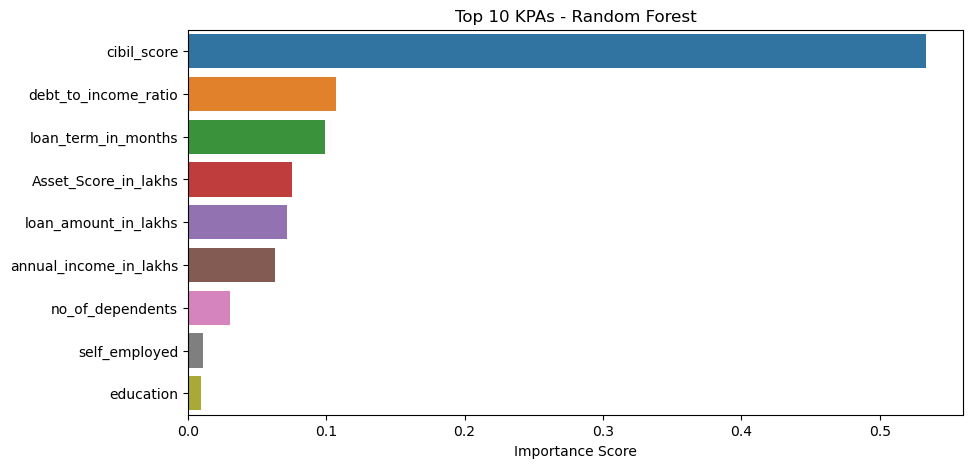

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x=importances_rf.values[:10], y=importances_rf.index[:10])
plt.title("Top 10 KPAs - Random Forest")
plt.xlabel("Importance Score")
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Top_10_KPAs-Random_Forest.png")
plt.show()

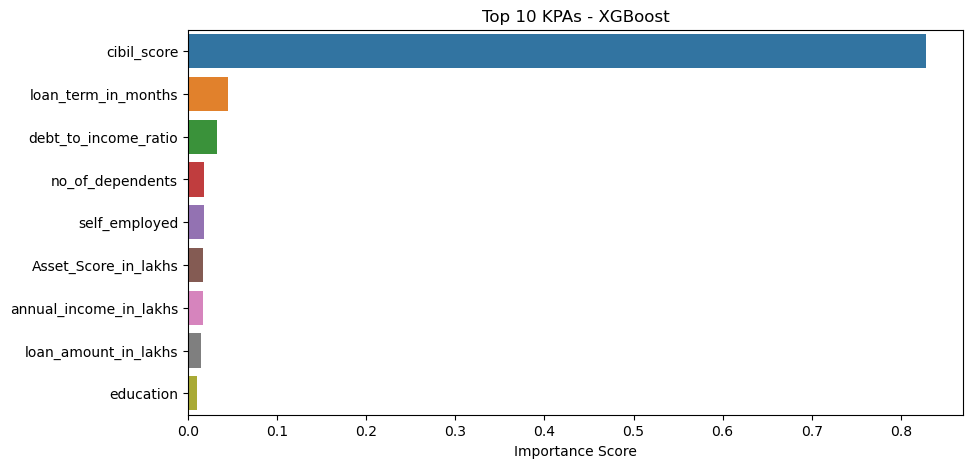

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(x=importances_xgb.values[:10], y=importances_xgb.index[:10])
plt.title("Top 10 KPAs - XGBoost")
plt.xlabel("Importance Score")
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Top_10_KPAs-XGBoost.png")
plt.show()

# Evaluation Metrics

In [9]:
def evaluate_model(y_true, y_pred, y_proba, model_name="Model"):
    print(f"--- {model_name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("ROC AUC  :", roc_auc_score(y_true, y_proba))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_train, y_pred_rf, y_proba_rf, "Random Forest")
evaluate_model(y_train, y_pred_xgb, y_proba_xgb, "XGBoost")

--- Random Forest ---
Accuracy : 0.9306002928257686
Precision: 0.8668515950069348
Recall   : 0.9652509652509652
F1 Score : 0.9134088417975885
ROC AUC  : 0.9555729584031469

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      2120
           1       0.87      0.97      0.91      1295

    accuracy                           0.93      3415
   macro avg       0.92      0.94      0.93      3415
weighted avg       0.94      0.93      0.93      3415

--- XGBoost ---
Accuracy : 0.9162518301610542
Precision: 0.8647866955892987
Recall   : 0.9235521235521236
F1 Score : 0.8932038834951456
ROC AUC  : 0.9564001602680847

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2120
           1       0.86      0.92      0.89      1295

    accuracy                           0.92      3415
   macro avg       0.91      0.92      0.91      3415
weighted avg 

# Confusion Matrix Visualization

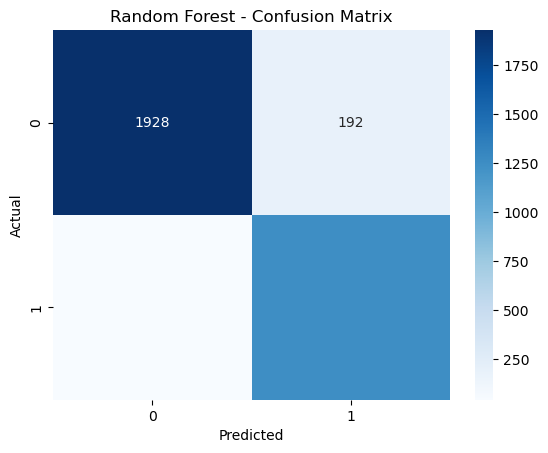

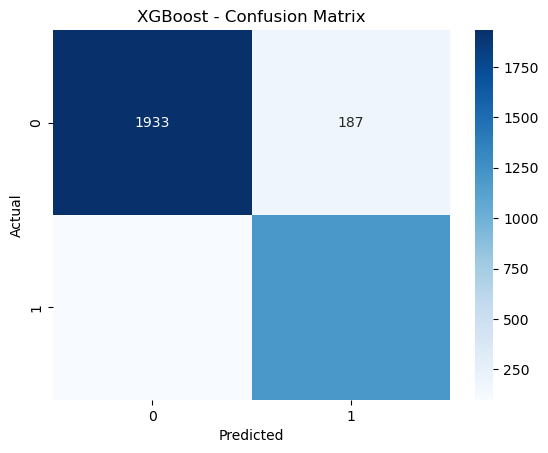

In [10]:
def plot_conf_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_train, y_pred_rf, "Random Forest")
plot_conf_matrix(y_train, y_pred_xgb, "XGBoost")


# ROC Curve

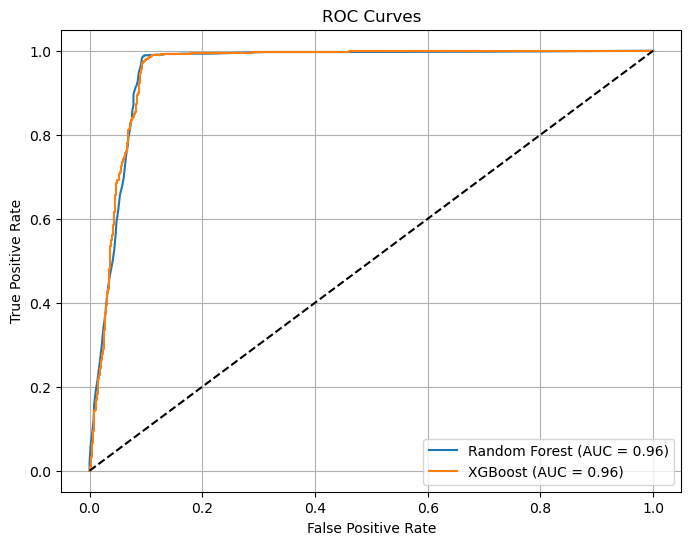

In [11]:
def plot_roc(y_true, y_proba, model_name="Model"):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.figure(figsize=(8, 6))
plot_roc(y_train, y_proba_rf, "Random Forest")
plot_roc(y_train, y_proba_xgb, "XGBoost")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\ROC_Curves.png")
plt.show()

# Save Evaluation Report to Text File

In [12]:
with open(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\evaluation_report.txt", 'w') as f:
    f.write("===== Random Forest =====\n")
    f.write(classification_report(y_train, y_pred_rf))
    f.write("\n===== XGBoost =====\n")
    f.write(classification_report(y_train, y_pred_xgb))